## Well Logs - Porosity and permeability calculation

In [1]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt


### First, I calculate porosity for the P02 well and then I will build a function to calculate the same for all the wells

In [2]:
# Loading the data from the txt file for the well P02
df = pd.read_csv('logs/P02_welllogs.txt', header = 3, sep = '\t') 
df.head(10)

,depth(m),transit time (micron/sec)
0,2137.3300,261.355329
1,2137.4786,261.201213
2,2137.6272,263.410757
3,2137.7758,266.517109
4,2137.9244,262.191017
5,2138.0730,266.590738
6,2138.2216,265.521461
7,2138.3702,268.435921
8,2138.5188,259.088188
9,2138.6674,268.846480


### Assumptions:

1) As Saikumar said, the values they provided in logs are in "micronsec/meter" but they mentioned it ad micron/sec.

2) The lithology is shale 

In [3]:
# rename the column title unit to microsec/meter
df = df.rename(columns={'depth(m)':'Depth [m]', ' transit time (micron/sec)':'Transit time [microsec/meter]'})
df.head(10)

,Depth [m],Transit time [microsec/meter]
0,2137.3300,261.355329
1,2137.4786,261.201213
2,2137.6272,263.410757
3,2137.7758,266.517109
4,2137.9244,262.191017
5,2138.0730,266.590738
6,2138.2216,265.521461
7,2138.3702,268.435921
8,2138.5188,259.088188
9,2138.6674,268.846480


In [4]:
# build the Transit time column in microsec/fet
df["Transit time [microsec/ft]"] = df["Transit time [microsec/meter]"]/3.2808399
df.head()

,Depth [m],Transit time [microsec/meter],Transit time [microsec/ft]
0,2137.3300,261.355329,79.661104
1,2137.4786,261.201213,79.614130
2,2137.6272,263.410757,80.287599
3,2137.7758,266.517109,81.234415
4,2137.9244,262.191017,79.915822


In [5]:
# built the Vp
df["Vp [ft/sec]"] = (1/df["Transit time [microsec/ft]"])*10**6
df.head()

,Depth [m],Transit time [microsec/meter],Transit time [microsec/ft],Vp [ft/sec]
0,2137.3300,261.355329,79.661104,12553.177747
1,2137.4786,261.201213,79.614130,12560.584472
2,2137.6272,263.410757,80.287599,12455.223687
3,2137.7758,266.517109,81.234415,12310.053611
4,2137.9244,262.191017,79.915822,12513.166689


### Calculate the Porosity based on the Wyllie formula; 
### Assumptions: Shale	∆tma	60 μsec/ft	
###                          Brine	∆tp	    180,5 μsec/ft	

![title](Formula_Wyllie.png)

In [6]:
#Calculate the Porosity based on the Wyllie formula
df["Porosity - Wyllie"] = (df["Transit time [microsec/ft]"]-60)/(180.5-60)
df.head()

,Depth [m],Transit time [microsec/meter],Transit time [microsec/ft],Vp [ft/sec],Porosity - Wyllie
0,2137.3300,261.355329,79.661104,12553.177747,0.163163
1,2137.4786,261.201213,79.614130,12560.584472,0.162773
2,2137.6272,263.410757,80.287599,12455.223687,0.168362
3,2137.7758,266.517109,81.234415,12310.053611,0.176219
4,2137.9244,262.191017,79.915822,12513.166689,0.165277


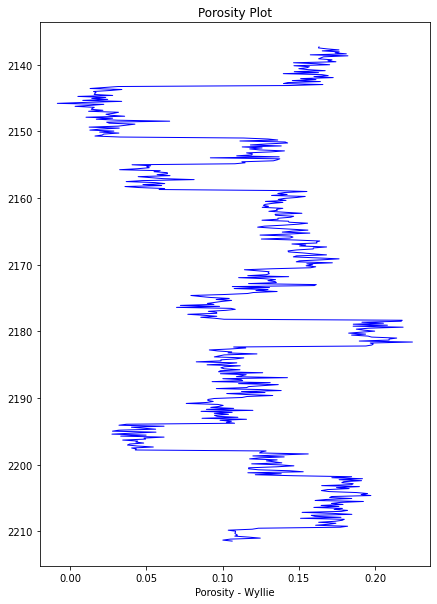

In [7]:
# plot the porosity
df.plot(x = "Porosity - Wyllie", y = "Depth [m]", c='blue', lw=1, legend=False, figsize=(7,10))

#plt.ylim(2130, 2200)
#plt.xlim(0,0.25)

plt.title('Porosity Plot')
plt.gca().invert_yaxis() #invert the y axis to increase depth as we go down
plt.show()

### Build a function that will take the file name of the well logs as input and then it will calculate both porosity and permeability. For permeability, I have used the formula (6) from the paper : https://www.sciencedirect.com/science/article/pii/S0306261919312437#b0160

In [8]:
# Build a function that will take the file name of the well logs as input and then it will calculate both porosity
# and permeability. For permeability, I have used the formula (6) from the paper : https://www.sciencedirect.com/science/article/pii/S0306261919312437#b0160
 
def por_perm_function (well_log_filename):
    
    df = pd.read_csv(well_log_filename, header = 3, sep = '\t')
    df = df.rename(columns={'depth(m)':'Depth [m]', ' transit time (micron/sec)':'Transit time [microsec/meter]'})
    df["Transit time [microsec/ft]"] = df["Transit time [microsec/meter]"]/3.2808399
    df["Vp [ft/sec]"] = (1/df["Transit time [microsec/ft]"])*10**6
    df["Porosity - Wyllie"] = (df["Transit time [microsec/ft]"]-60)/(180.5-60)*100
    
    # calculate permeability using the formula from the paper
    
    df["Permeability [mDa]"] = (10**(-2.03*10**(-7)*df["Porosity - Wyllie"].pow(5)+2.55*10**(-5)*df["Porosity - Wyllie"].pow(4)-1.04*10**(-3)*df["Porosity - Wyllie"].pow(3)+8.91*10**(-3)*df["Porosity - Wyllie"].pow(2)+3.58*10**(-1)*df["Porosity - Wyllie"]-3.21*df["Porosity - Wyllie"].pow(0)))
    #(10.^(-2.03*10^-7*ran.^5+2.55*10^-5*ran.^4-1.04*10^-3*ran.^3+8.91*10^-3*ran.^2+3.58*10^-1*ran-3.21*ran.^0))
    return df

In [9]:
# apply the built function to all the well logs to calculate porosity and permeability
wellog_p01 = por_perm_function('logs/P01_welllogs.txt')
wellog_p02 = por_perm_function('logs/P02_welllogs.txt')
wellog_p03 = por_perm_function('logs/P03_welllogs.txt')
wellog_e02 = por_perm_function('logs/E02_welllogs.txt')
wellog_e03 = por_perm_function('logs/E03_welllogs.txt')
wellog_e05 = por_perm_function('logs/E05_welllogs.txt')
wellog_e06 = por_perm_function('logs/E06_welllogs.txt')
wellog_i01 = por_perm_function('logs/I01_welllogs.txt')
wellog_i03 = por_perm_function('logs/I03_welllogs.txt')


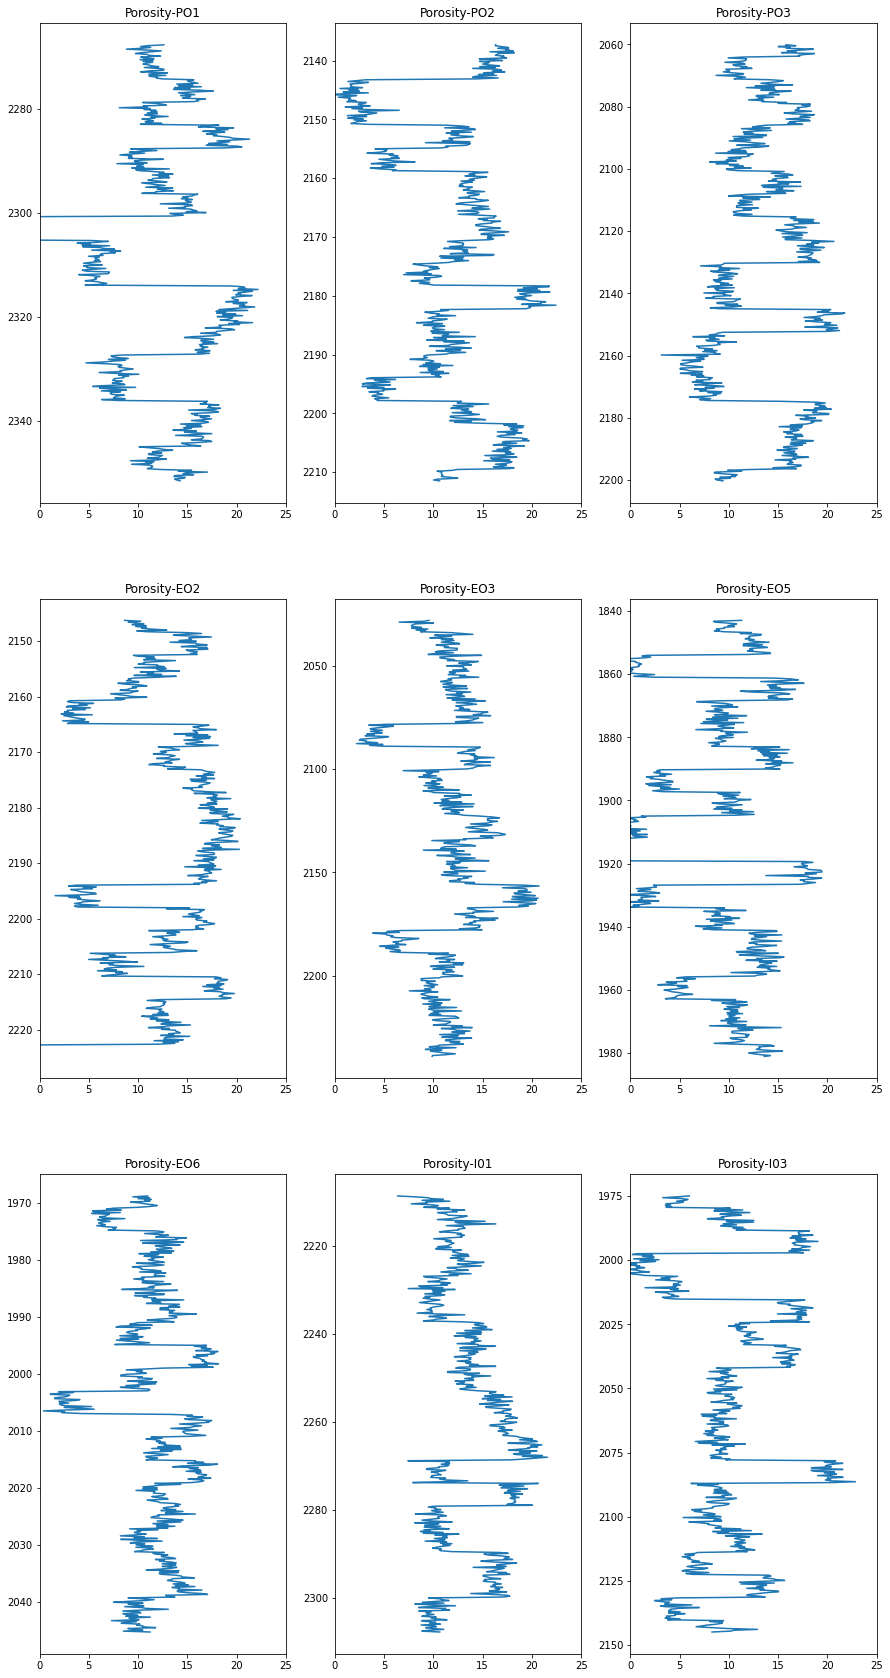

In [10]:
# Plot the porosity for all the wells 
# I didn't choose the same depth interval for all the plots since the values of depth are not quite in the same range

figure, axis = plt.subplots(3, 3,figsize=(15,30))

#p01
axis[0, 0].plot(wellog_p01["Porosity - Wyllie"], wellog_p01["Depth [m]"])
axis[0, 0].set_title("Porosity-PO1")
axis[0,0].set(xlim=(0, 25))
axis[0,0].invert_yaxis() #invert the y axis to increase depth as we go down

#p02
axis[0, 1].plot(wellog_p02["Porosity - Wyllie"], wellog_p02["Depth [m]"])
axis[0, 1].set_title("Porosity-PO2")
axis[0,1].set(xlim=(0, 25))
axis[0,1].invert_yaxis()
  
#p03
axis[0, 2].plot(wellog_p03["Porosity - Wyllie"], wellog_p03["Depth [m]"])
axis[0, 2].set_title("Porosity-PO3")
axis[0,2].set(xlim=(0, 25))
axis[0,2].invert_yaxis()
  
#e02
axis[1, 0].plot(wellog_e02["Porosity - Wyllie"], wellog_e02["Depth [m]"])
axis[1, 0].set_title("Porosity-EO2")
axis[1,0].set(xlim=(0, 25))
axis[1,0].invert_yaxis()
  
#e03
axis[1, 1].plot(wellog_e03["Porosity - Wyllie"], wellog_e03["Depth [m]"])
axis[1, 1].set_title("Porosity-EO3")
axis[1,1].set(xlim=(0, 25))
axis[1,1].invert_yaxis()

#e05
axis[1, 2].plot(wellog_e05["Porosity - Wyllie"], wellog_e05["Depth [m]"])
axis[1, 2].set_title("Porosity-EO5")
axis[1,2].set(xlim=(0, 25))
axis[1,2].invert_yaxis()

#e06
axis[2, 0].plot(wellog_e06["Porosity - Wyllie"], wellog_e06["Depth [m]"])
axis[2, 0].set_title("Porosity-EO6")
axis[2,0].set(xlim=(0, 25))
axis[2,0].invert_yaxis()

#I01
axis[2, 1].plot(wellog_i01["Porosity - Wyllie"], wellog_i01["Depth [m]"])
axis[2, 1].set_title("Porosity-I01")
axis[2,1].set(xlim=(0, 25))
axis[2,1].invert_yaxis()

#I03
axis[2, 2].plot(wellog_i03["Porosity - Wyllie"], wellog_i03["Depth [m]"])
axis[2, 2].set_title("Porosity-I03")
axis[2,2].set(xlim=(0, 25))
axis[2,2].invert_yaxis()

plt.show()

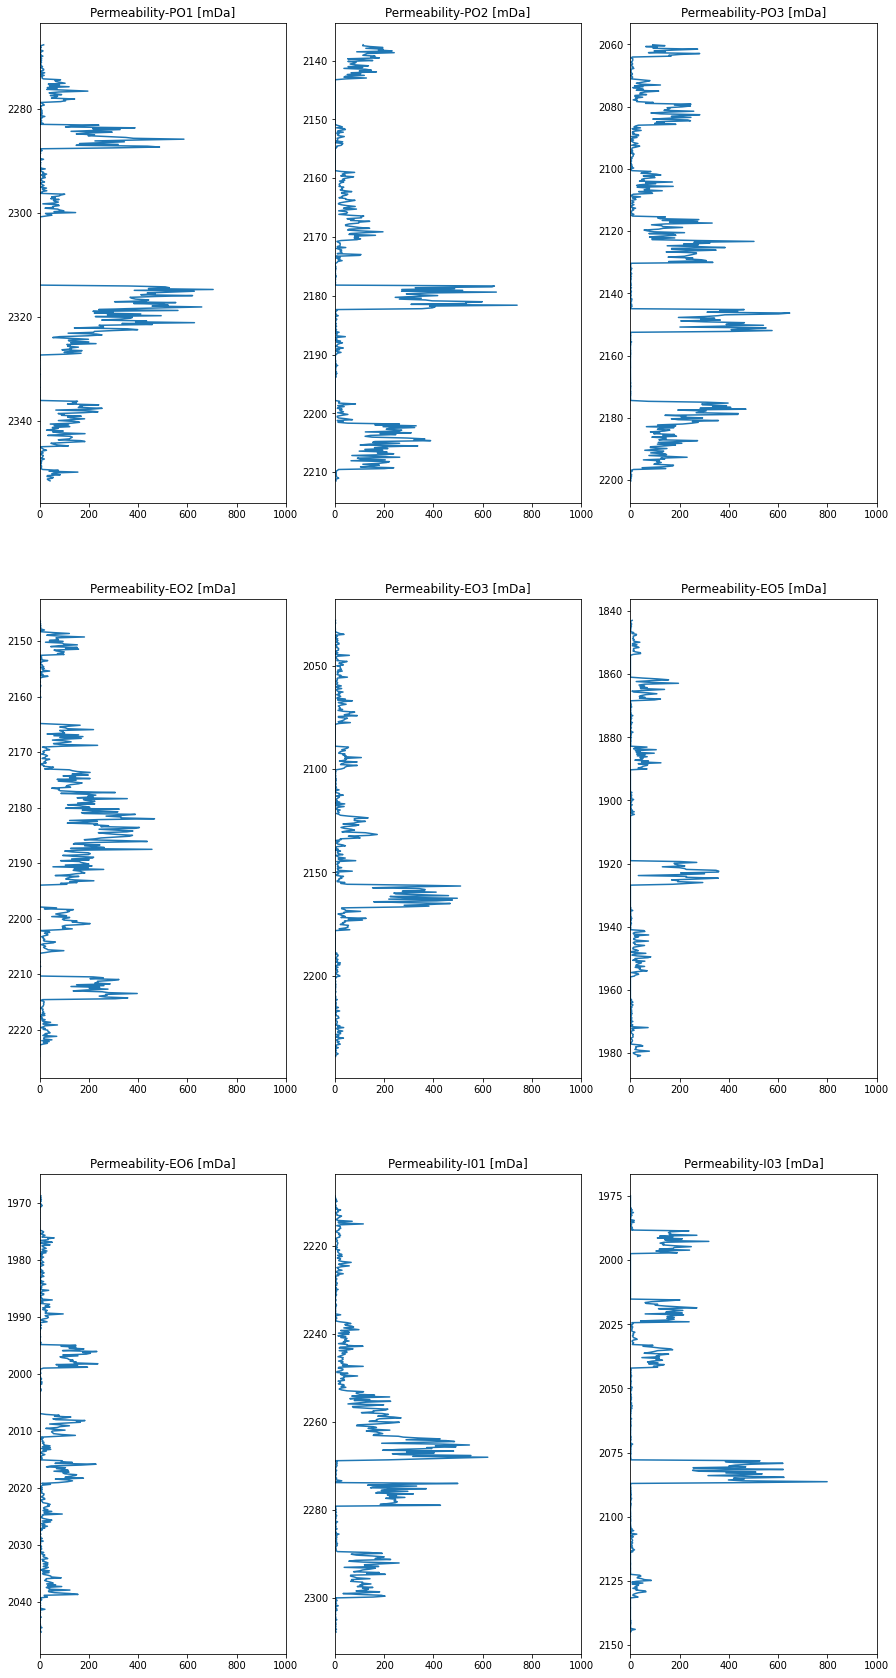

In [11]:
# plot the permeability plot for each well
figure, axis = plt.subplots(3, 3,figsize=(15,30))

#p01
axis[0, 0].plot(wellog_p01["Permeability [mDa]"], wellog_p01["Depth [m]"])
axis[0, 0].set_title("Permeability-PO1 [mDa]")
axis[0,0].set(xlim=(0, 1000))
axis[0,0].invert_yaxis() #invert the y axis to increase depth as we go down
  
#p02
axis[0, 1].plot(wellog_p02["Permeability [mDa]"], wellog_p02["Depth [m]"])
axis[0, 1].set_title("Permeability-PO2 [mDa]")
axis[0,1].set(xlim=(0, 1000))
axis[0,1].invert_yaxis()
  
#p03
axis[0, 2].plot(wellog_p03["Permeability [mDa]"], wellog_p03["Depth [m]"])
axis[0, 2].set_title("Permeability-PO3 [mDa]")
axis[0,2].set(xlim=(0, 1000))
axis[0,2].invert_yaxis()
  
#e02
axis[1, 0].plot(wellog_e02["Permeability [mDa]"], wellog_e02["Depth [m]"])
axis[1, 0].set_title("Permeability-EO2 [mDa]")
axis[1,0].set(xlim=(0, 1000))
axis[1,0].invert_yaxis()
  
#e03
axis[1, 1].plot(wellog_e03["Permeability [mDa]"], wellog_e03["Depth [m]"])
axis[1, 1].set_title("Permeability-EO3 [mDa]")
axis[1,1].set(xlim=(0, 1000))
axis[1,1].invert_yaxis()

#e05
axis[1, 2].plot(wellog_e05["Permeability [mDa]"], wellog_e05["Depth [m]"])
axis[1, 2].set_title("Permeability-EO5 [mDa]")
axis[1,2].set(xlim=(0, 1000))
axis[1,2].invert_yaxis()

#e06
axis[2, 0].plot(wellog_e06["Permeability [mDa]"], wellog_e06["Depth [m]"])
axis[2, 0].set_title("Permeability-EO6 [mDa]")
axis[2,0].set(xlim=(0, 1000))
axis[2,0].invert_yaxis()

#I01
axis[2, 1].plot(wellog_i01["Permeability [mDa]"], wellog_i01["Depth [m]"])
axis[2, 1].set_title("Permeability-I01 [mDa]")
axis[2,1].set(xlim=(0, 1000))
axis[2,1].invert_yaxis()

#I03
axis[2, 2].plot(wellog_i03["Permeability [mDa]"], wellog_i03["Depth [m]"])
axis[2, 2].set_title("Permeability-I03 [mDa]")
axis[2,2].set(xlim=(0, 1000))
axis[2,2].invert_yaxis()

plt.show()